<a href="https://colab.research.google.com/github/Saurabh919yadav/Art-generator/blob/master/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# importing necessary libraries
import cv2 # for open-cv
import numpy as np
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
from skimage.measure import compare_ssim
import math

In [0]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [0]:
#reading image
img = cv2.imread("/content/drive/My Drive/Minor project/dog.jpg")

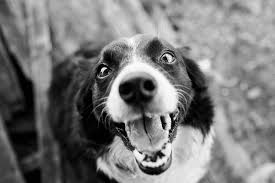

In [0]:
#displaying read image
cv2_imshow(img)

In [0]:
#shape of the image
print(img.shape)

(183, 275, 3)


In [0]:
#Converting image from RGB to grayscale
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

(183, 275)


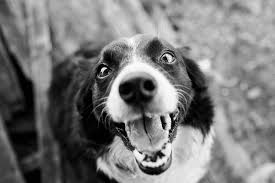

In [0]:
# printing shape and image of converted image
print(img.shape)
cv2_imshow(img)

### Global thresholding
Global thresholding is based on the assumption that an image has a bimodal histogram and, therefore, the object can be extracted from the background by a simple operation that compares image values with a threshold value. 

In [0]:
ret,thresh = cv2.threshold(img,150,255,cv2.THRESH_BINARY)

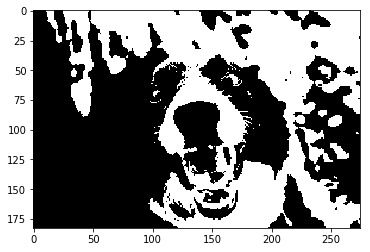

In [0]:
# Image after global thresholding 
plt.imshow(thresh,'gray') 

In [0]:
(score, diff) = compare_ssim(img, thresh, full=True)
diff = (diff * 255).astype("uint8")

print("SSIM: {}".format(score))


SSIM: 0.23454821169400705


### Adaptive thresholding
In simple thresholding, the threshold value is global, i.e., it is same for all the pixels in the image. Adaptive thresholding is the method where the threshold value is calculated for smaller regions and therefore, there will be different threshold values for different regions.

SSIM: 0.21342212000725436


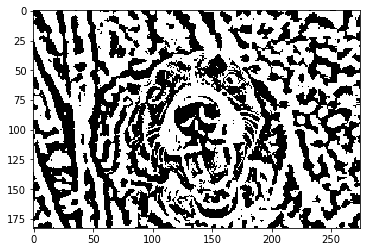

In [0]:
# adptive thresholding using simple mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# adaptive thresholding using gaussian mean 
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

#image with adptive thresholding using simple mean
plt.imshow(th2,'gray')
(score, diff) = compare_ssim(img, th2, full=True)
print("SSIM: {}".format(score))



SSIM: 0.18793946232880598


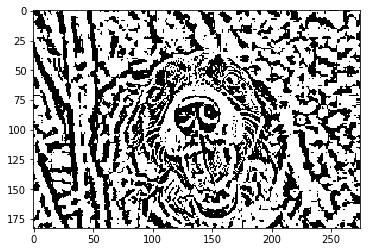

In [0]:
#image with adptive thresholding using gaussian mean
plt.imshow(th3,'gray')

(score, diff) = compare_ssim(img, th3, full=True)
print("SSIM: {}".format(score))


### Thresholding uaing otsu's algorithm
Otsu's method is a means of automatically finding an optimal threshold based on the observed distribution of pixel values.

SSIM: 0.3046198725096487


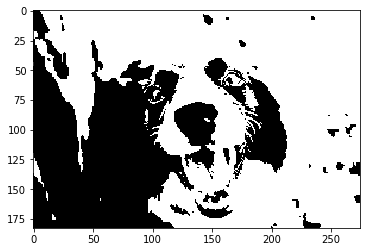

In [0]:
retval2,threshold2 = cv2.threshold(img,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Image after global thresholding 
plt.imshow(threshold2,'gray') 
(score, diff) = compare_ssim(img, threshold2, full=True)
print("SSIM: {}".format(score))

In [0]:
# Histogram of the taken image
hist = cv2.calcHist([img],[0],None,[256],[0,256])

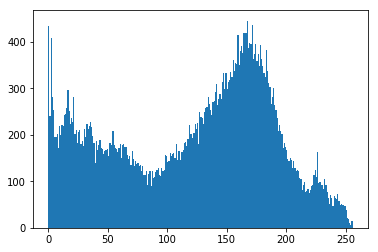

In [0]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

### Examining these techniques with any other image
We will analyse these same techniquesfor any other image that does not have so much separation in the histogram 

(180, 281, 3)


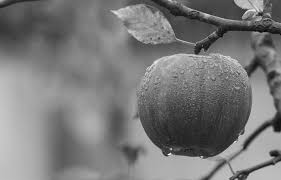

In [0]:
img1 = cv2.imread('/content/drive/My Drive/Minor project/apple.jpg')
print(img1.shape)
cv2_imshow(img1)

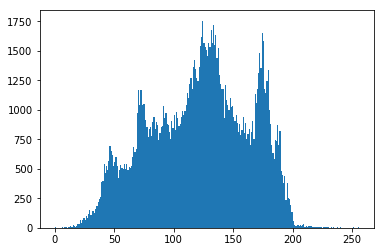

In [0]:
# Histogram of the taken image
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.hist(img1.ravel(),256,[0,256]); plt.show()

In [0]:
#Converting image from RGB to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

(180, 281)


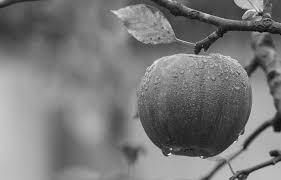

In [0]:
print(img1.shape)
cv2_imshow(img1)

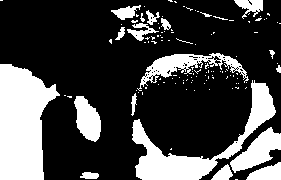

SSIM: 0.19335830243574745


In [0]:
#global thresholding
ret,thresh = cv2.threshold(img1,150,255,cv2.THRESH_BINARY)
cv2_imshow(thresh)
(score, diff) = compare_ssim(img1, thresh, full=True)
print("SSIM: {}".format(score))


In [0]:
# adaptive thresholding
th2 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# adaptive thresholding using gaussian mean 
th3 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

SSIM: 0.26652092307491776


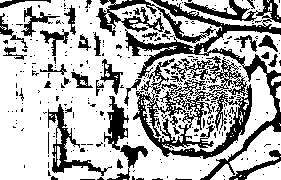

In [0]:
(score, diff) = compare_ssim(img1, th2, full=True)
print("SSIM: {}".format(score))
cv2_imshow(th2)

SSIM: 0.255785901128875


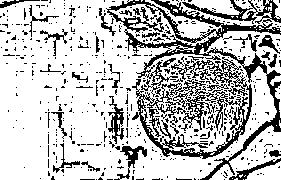

In [0]:
(score, diff) = compare_ssim(img1, th3, full=True)
print("SSIM: {}".format(score))
cv2_imshow(th3)

SSIM: 0.3587017447856667


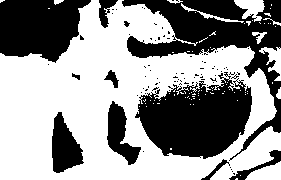

In [0]:
#Thresholding using otsu algorithm
retval2,thresh2 = cv2.threshold(img1,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Image after global thresholding 
(score, diff) = compare_ssim(img1, thresh2, full=True)
print("SSIM: {}".format(score))
cv2_imshow(thresh2) 